In [283]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Rejection Dataset

In [284]:
# a_loans = pd.read_csv('accepted_2007_to_2018Q4.csv',parse_dates=['issue_d'])
r_loans = pd.read_csv('rejected_2007_to_2018Q4.csv',parse_dates=['Application Date'])

KeyboardInterrupt: 

In [285]:
r_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Amount Requested      float64       
 1   Application Date      datetime64[ns]
 2   Loan Title            object        
 3   Risk_Score            float64       
 4   Debt-To-Income Ratio  float64       
 5   Zip Code              object        
 6   State                 object        
 7   Employment Length     object        
 8   Policy Code           float64       
 9   Year                  int64         
 10  Crisis_2016           object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 2.3+ GB


In [78]:
r_loans.loc[:,'Debt-To-Income Ratio'] = r_loans['Debt-To-Income Ratio'].apply(lambda x : float(x.strip("%"))/100)

In [79]:
r_loans.groupby('Employment Length').agg({'Policy Code' : 'count'})

,Policy Code
Employment Length,
1 year,267788
10+ years,416038
2 years,199137
3 years,177281
4 years,121573
5 years,2279422
6 years,71583
7 years,55627
8 years,65940


In [80]:
r_loans.head().T

,0,1,2,3,4
Amount Requested,1000.0,1000.0,11000.0,6000.0,1500.0
Application Date,2007-05-26 00:00:00,2007-05-26 00:00:00,2007-05-27 00:00:00,2007-05-27 00:00:00,2007-05-27 00:00:00
Loan Title,Wedding Covered but No Honeymoon,Consolidating Debt,Want to consolidate my debt,waksman,mdrigo
Risk_Score,693.0,703.0,715.0,698.0,509.0
Debt-To-Income Ratio,0.1,0.1,0.1,0.3864,0.0943
Zip Code,481xx,010xx,212xx,017xx,209xx
State,NM,MA,MD,MA,MD
Employment Length,4 years,< 1 year,1 year,< 1 year,< 1 year
Policy Code,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

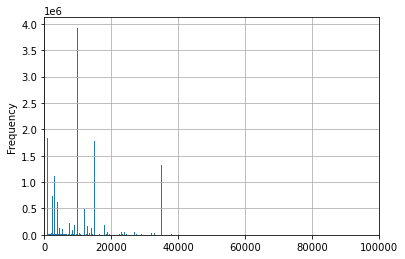

In [303]:
r_loans["Amount Requested"].plot.hist(by="Amount Requested", bins=10000, grid = True, xlim = (0,1e5))

<AxesSubplot:ylabel='Frequency'>

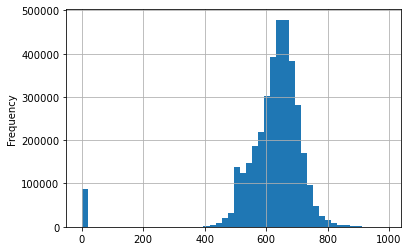

In [81]:
r_loans[r_loans['Application Date']<datetime(2016,1,1)]["Risk_Score"].plot.hist(by="Risk_Score", bins=50, grid = True)

<AxesSubplot:ylabel='Frequency'>

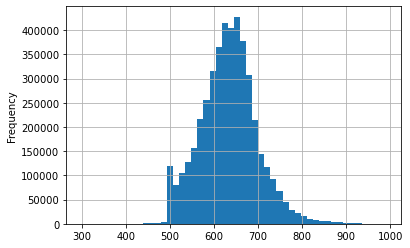

In [82]:
r_loans[r_loans['Application Date']>=datetime(2017,1,1)]["Risk_Score"].plot.hist(by="Risk_Score", bins=50, grid = True)

In [83]:
# description.to_csv("Accepted Loans Columns Description.csv",index=True)
print(len(r_loans[r_loans['Application Date']<datetime(2016,1,1)]))
r_loans[r_loans['Application Date']<datetime(2016,1,1)].describe()

6309512


,Amount Requested,Risk_Score,Debt-To-Income Ratio,Policy Code
count,6.309512e+06,3.658310e+06,6.309512e+06,6.309512e+06
mean,1.341109e+04,6.205829e+02,2.453204e+00,4.896734e-03
std,1.595618e+04,1.177503e+02,2.128932e+02,9.884074e-02
min,0.000000e+00,0.000000e+00,-1.000000e-02,0.000000e+00
25%,4.000000e+03,5.890000e+02,5.340000e-02,0.000000e+00
50%,1.000000e+04,6.410000e+02,1.710000e-01,0.000000e+00
75%,2.000000e+04,6.790000e+02,3.251000e-01,0.000000e+00
max,1.400000e+06,9.900000e+02,5.000003e+05,2.000000e+00


In [84]:
print(len(r_loans[r_loans['Application Date']>=datetime(2017,1,1)]))
r_loans[r_loans['Application Date']>=datetime(2016,1,1)].describe()

16569355


,Amount Requested,Risk_Score,Debt-To-Income Ratio,Policy Code
count,1.656936e+07,4.474504e+06,1.656936e+07,1.656844e+07
mean,1.296052e+04,6.331776e+02,1.104590e+00,6.931855e-03
std,1.415784e+04,6.488779e+01,1.713680e+01,1.175400e-01
min,0.000000e+00,3.000000e+02,-1.000000e-02,0.000000e+00
25%,5.000000e+03,5.920000e+02,9.410000e-02,0.000000e+00
50%,1.000000e+04,6.340000e+02,2.130000e-01,0.000000e+00
75%,2.000000e+04,6.720000e+02,3.911000e-01,0.000000e+00
max,3.000000e+05,9.900000e+02,1.143590e+04,2.000000e+00


## Inferences :
1. Large no of rejections happening after 2017
2. Though the Risk Score threshold for rejection has remained the same, the Debt-To-Income ratio has become strict

In [85]:
r_loans['Year'] = r_loans['Application Date'].apply(lambda x : x.year)
r_loans.groupby('Year').agg({'Amount Requested' : 'mean','Risk_Score' : 'mean', 'Debt-To-Income Ratio' : 'mean', 'Policy Code' : 'count'})

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Policy Code
Year,,,,
2007,8547.615013,550.270406,11.517184,5274
2008,8612.968733,572.225812,17.723695,25596
2009,10330.259241,578.308815,43.210668,56991
2010,11070.965643,582.698032,12.353345,112561
2011,12900.989247,578.707405,8.653758,217792
2012,14361.402868,605.406732,2.555678,337277
2013,13236.073610,610.609468,2.145858,760942
2014,12500.403927,632.813985,1.714455,1933700
2015,14205.735540,637.153259,1.194732,2859379


In [88]:
r_loans.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code', 'Year'],
      dtype='object')

In [90]:
r_loans['Crisis_2016'] = r_loans['Year'].apply(lambda x : '>=2016' if x >= 2016 else '<2016')

In [91]:
r_loans.groupby(['Crisis_2016','Employment Length']).agg({'Policy Code' : 'count'})

Policy Code
Crisis_2016 Employment Length             
<2016       1 year                   53021
            10+ years               164804
            2 years                  61091
            3 years                  51341
            4 years                  38180
            5 years                 344309
            6 years                  28526
            7 years                  24958
            8 years                  23742
            9 years                  17809
            < 1 year               5376928
>=2016      1 year                  214767
            10+ years               251234
            2 years                 138046
            3 years                 125940
            4 years                  83393
            5 years                1935113
            6 years                  43057
            7 years                  30669
            8 years                  42198
            9 years                  30112
            < 1 year              17617329

## Inferences : 
1. is there change in pattern of rejections based on employment status of the person?
2. need to look in combination with the approvals to get the entire volume

# Accepted Loans Dataset

In [92]:
a_loans = pd.read_csv('accepted_2007_to_2018Q4.csv',parse_dates=['issue_d'])

/Users/abhinaykumar/opt/anaconda3/envs/P37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
a_loans['Year'] = a_loans['issue_d'].apply(lambda x : x.year)

In [97]:
# a_loans.loc[:,'dti'] = a_loans['dti'].apply(lambda x : float(x.strip("%"))/100)
a_loans.loc[:,'dti'] = a_loans['dti']/100.0

In [135]:
a_loans.loc[:,'dti_joint'] = a_loans['dti_joint']/100.0

In [98]:
a_loans.groupby('emp_length').agg({'policy_code' : 'count'})

,policy_code
emp_length,
1 year,148403
10+ years,748005
2 years,203677
3 years,180753
4 years,136605
5 years,139698
6 years,102628
7 years,92695
8 years,91914


In [99]:
a_loans.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,Year
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000,2.260668e+06
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e-01,3.068792e-01,6.985882e+02,...,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322,2.015858e+03
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e-01,8.672303e-01,3.301038e+01,...,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980,1.792634e+00
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e-02,0.000000e+00,6.100000e+02,...,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000,2.007000e+03
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e-01,0.000000e+00,6.750000e+02,...,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000,2.015000e+03
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e-01,0.000000e+00,6.900000e+02,...,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000,2.016000e+03
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e-01,0.000000e+00,7.150000e+02,...,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000,2.017000e+03
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+00,5.800000e+01,8.450000e+02,...,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000,2.018000e+03


## Some thoughts : 
### A. Loan Approval
1. Process leniency in loan approval - change over time
2. which factors show there was a bit of leniency - 4-5

### B. Business
1. KPIs - 2,3
2. How did these change over time - especially after the crisis of 2016

### C. One extra pattern/story that I see


## A. Loan Approval

In [263]:
loan_approval = a_loans[['debt_settlement_flag','disbursement_method','zip_code',\
#                          'verified_status_joint',\
                         'acc_now_delinq','delinq_amnt','loan_status',\
                         'int_rate',\
                         'hardship_flag','hardship_type','hardship_reason','hardship_status','hardship_length',\
                         'settlement_status','settlement_amount','settlement_percentage','settlement_term',\
                         'verification_status','title','grade','pymnt_plan','purpose','pub_rec_bankruptcies',\
                         'pub_rec','policy_code','loan_amnt','issue_d','home_ownership','funded_amnt_inv',\
                         'funded_amnt','fico_range_low','fico_range_high','emp_length','dti_joint','dti',\
                         'application_type','annual_inc_joint','annual_inc','Year']]

<AxesSubplot:ylabel='Frequency'>

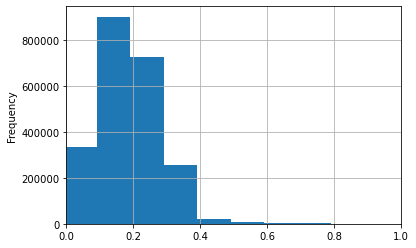

In [137]:
# DTI
loan_approval['dti'].plot.hist(by = 'dti', bins = 100, grid = True, xlim = (0.0,1.0))

In [279]:
loan_approval.groupby('Year').agg({'dti' : 'mean'})

,dti
Year,
2007.0,0.107095
2008.0,0.132046
2009.0,0.124665
2010.0,0.130952
2011.0,0.138463
2012.0,0.166614
2013.0,0.172180
2014.0,0.180408
2015.0,0.191484


In [282]:
print(loan_approval['dti'].mean())
print(loan_approval['dti'].std())
print(r_loans['Debt-To-Income Ratio'].mean()/100.0)
print(r_loans['Debt-To-Income Ratio'].std())

0.18824196436674093
0.14183328543078136
1.4334005091588118
105.39163170283285


<AxesSubplot:ylabel='Frequency'>

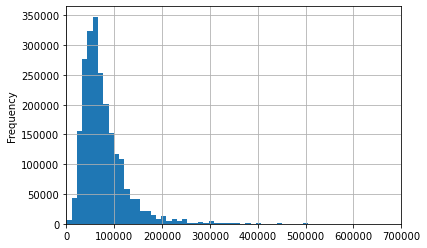

In [139]:
# Annual Income
loan_approval['annual_inc'].plot.hist(by = 'annual_inc', bins = 10000, grid = True, xlim = (0,0.7e6))

## Joint Application

In [140]:
loan_approval.groupby(['application_type','Year']).agg({'policy_code' : 'count'})

policy_code
application_type Year               
Individual       2007.0          603
                 2008.0         2393
                 2009.0         5281
                 2010.0        12537
                 2011.0        21721
                 2012.0        53367
                 2013.0       134814
                 2014.0       235629
                 2015.0       420584
                 2016.0       425618
                 2017.0       401154
                 2018.0       426257
Joint App        2015.0          511
                 2016.0         8789
                 2017.0        42425
                 2018.0        68985

In [141]:
loan_approval[loan_approval['application_type']=='Joint App'].describe()

,pub_rec_bankruptcies,pub_rec,policy_code,loan_amnt,funded_amnt_inv,funded_amnt,fico_range_low,fico_range_high,dti_joint,dti,annual_inc_joint,annual_inc,Year
count,120710.000000,120710.000000,120710.0,120710.000000,120710.000000,120710.000000,120710.000000,120710.000000,120706.000000,118999.000000,1.207100e+05,1.207100e+05,120710.000000
mean,0.128829,0.155331,1.0,19632.402659,19627.871337,19632.319816,711.765098,715.766374,0.192518,0.319703,1.236246e+05,6.011094e+04,2017.490216
std,0.346679,0.427531,0.0,10589.935091,10589.249237,10589.971330,39.782768,39.787056,0.078221,0.485774,7.416135e+04,5.245647e+04,0.648791
min,0.000000,0.000000,1.0,1000.000000,750.000000,1000.000000,660.000000,664.000000,0.000000,-0.010000,5.693510e+03,0.000000e+00,2015.000000
25%,0.000000,0.000000,1.0,10500.000000,10500.000000,10500.000000,680.000000,684.000000,0.135300,0.153800,8.340000e+04,3.500000e+04,2017.000000
50%,0.000000,0.000000,1.0,18400.000000,18400.000000,18400.000000,705.000000,709.000000,0.188400,0.249800,1.100000e+05,5.200000e+04,2018.000000
75%,0.000000,0.000000,1.0,28000.000000,28000.000000,28000.000000,735.000000,739.000000,0.246200,0.369700,1.479950e+05,7.500000e+04,2018.000000
max,7.000000,14.000000,1.0,40000.000000,40000.000000,40000.000000,845.000000,850.000000,0.694900,9.990000,7.874821e+06,6.240000e+06,2018.000000


In [142]:
loan_approval[loan_approval['application_type']=='Individual'].describe()

,pub_rec_bankruptcies,pub_rec,policy_code,loan_amnt,funded_amnt_inv,funded_amnt,fico_range_low,fico_range_high,dti_joint,dti,annual_inc_joint,annual_inc,Year
count,2.138593e+06,2.139929e+06,2139958.0,2.139958e+06,2.139958e+06,2.139958e+06,2.139958e+06,2.139958e+06,0.0,2.139958e+06,0.0,2.139954e+06,2.139958e+06
mean,1.281576e-01,1.999080e-01,1.0,1.478828e+04,1.476371e+04,1.478272e+04,6.978449e+02,7.018451e+02,NaN,1.809316e-01,NaN,7.900108e+04,2.015766e+03
std,3.655991e-01,5.774349e-01,0.0,9.035817e+03,9.037530e+03,9.033689e+03,3.242732e+01,3.242793e+01,NaN,8.425408e-02,NaN,1.150764e+05,1.792278e+00
min,0.000000e+00,0.000000e+00,1.0,5.000000e+02,0.000000e+00,5.000000e+02,6.100000e+02,6.140000e+02,NaN,-1.000000e-02,NaN,1.896000e+03,2.007000e+03
25%,0.000000e+00,0.000000e+00,1.0,8.000000e+03,8.000000e+03,8.000000e+03,6.750000e+02,6.790000e+02,NaN,1.178000e-01,NaN,4.740000e+04,2.015000e+03
50%,0.000000e+00,0.000000e+00,1.0,1.225000e+04,1.217500e+04,1.225000e+04,6.900000e+02,6.940000e+02,NaN,1.760000e-01,NaN,6.530000e+04,2.016000e+03
75%,0.000000e+00,0.000000e+00,1.0,2.000000e+04,2.000000e+04,2.000000e+04,7.150000e+02,7.190000e+02,NaN,2.404000e-01,NaN,9.500000e+04,2.017000e+03
max,1.200000e+01,8.600000e+01,1.0,4.000000e+04,4.000000e+04,4.000000e+04,8.450000e+02,8.500000e+02,NaN,4.996000e-01,NaN,1.100000e+08,2.018000e+03


In [316]:
# emp length
loan_approval[loan_approval['Year']>=2016].groupby('emp_length').agg({'policy_code' : 'count'})

,policy_code
emp_length,
1 year,91308
10+ years,456411
2 years,124804
3 years,110725
4 years,84075
5 years,83989
6 years,59676
7 years,48096
8 years,47957


<AxesSubplot:ylabel='Frequency'>

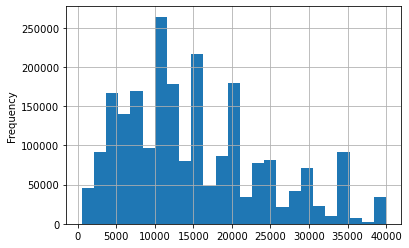

In [150]:
loan_approval['loan_amnt'].plot.hist(by = 'loan_amnt', bins = 25, grid = True)

In [314]:
loan_approval.groupby(['Year','home_ownership']).agg({'policy_code' : 'count'})

policy_code
Year   home_ownership             
2007.0 MORTGAGE                206
       NONE                      7
       OWN                      52
       RENT                    338
2008.0 MORTGAGE                931
       NONE                      1
       OTHER                    47
       OWN                     148
       RENT                   1266
2009.0 MORTGAGE               2048
       OTHER                    85
       OWN                     472
       RENT                   2676
2010.0 MORTGAGE               5617
       OTHER                     3
       OWN                     963
       RENT                   5954
2011.0 MORTGAGE              10157
       OTHER                     1
       OWN                    1616
       RENT                   9947
2012.0 MORTGAGE              24947
       NONE                     42
       OTHER                    46
       OWN                    4203
       RENT                  24129
2013.0 MORTGAGE              72065
       OWN                   11251
       RENT                  51498
2014.0 ANY                       1
       MORTGAGE             119937
       OWN                   23007
       RENT                  92684
2015.0 ANY                       2
       MORTGAGE             207683
       OWN                   45766
       RENT                 167644
2016.0 ANY                     110
       MORTGAGE             211516
       OWN                   53037
       RENT                 169744
2017.0 ANY                     395
       MORTGAGE             217123
       NONE                      4
       OWN                   52414
       RENT                 173643
2018.0 ANY                     488
       MORTGAGE             239220
       OWN                   60128
       RENT                 195406

## Slow but steady increase in the share of Home Owners & Mortages, decrease in in renters 

In [165]:
# Loan Amount
# steady increase in avg. loan amount borrowed
loan_approval.groupby('Year').agg({'loan_amnt' : 'mean', 'policy_code' : 'count'})

,loan_amnt,policy_code
Year,,
2007.0,8254.519071,603
2008.0,8825.428333,2393
2009.0,9833.033516,5281
2010.0,10528.240408,12537
2011.0,12047.503568,21721
2012.0,13461.709015,53367
2013.0,14707.413733,134814
2014.0,14870.156793,235629
2015.0,15240.285862,421095


In [183]:
loan_approval.groupby('Year').agg({'loan_amnt' : 'sum', 'policy_code' : 'count'})

,loan_amnt,policy_code
Year,,
2007.0,4.977475e+06,603
2008.0,2.111925e+07,2393
2009.0,5.192825e+07,5281
2010.0,1.319926e+08,12537
2011.0,2.616838e+08,21721
2012.0,7.184110e+08,53367
2013.0,1.982765e+09,134814
2014.0,3.503840e+09,235629
2015.0,6.417608e+09,421095


In [167]:
# payment plan
# change occured around 2015-16

loan_approval.groupby(['Year','pymnt_plan']).agg({'policy_code' : 'count'})

policy_code
Year   pymnt_plan             
2007.0 n                   603
2008.0 n                  2393
2009.0 n                  5281
2010.0 n                 12537
2011.0 n                 21721
2012.0 n                 53367
2013.0 n                134814
2014.0 n                235622
       y                     7
2015.0 n                421057
       y                    38
2016.0 n                434284
       y                   123
2017.0 n                443278
       y                   301
2018.0 n                495091
       y                   151

In [171]:
loan_approval.groupby(['purpose']).agg({'policy_code' : 'count'})

,policy_code
purpose,
car,24013
credit_card,516971
debt_consolidation,1277877
educational,424
home_improvement,150457
house,14136
major_purchase,50445
medical,27488
moving,15403


In [176]:
loan_approval[loan_approval['Year']<2016].groupby(['purpose']).agg({'policy_code' : 'count'})

,policy_code
purpose,
car,8864
credit_card,206194
debt_consolidation,524253
educational,423
home_improvement,51834
house,3707
major_purchase,17277
medical,8541
moving,5415


Seems to be no pattern in case of purose of loan 

In [179]:
# verification_status
loan_approval.groupby(['Year','verification_status']).agg({'policy_code' : 'count'})

policy_code
Year   verification_status             
2007.0 Not Verified                 603
2008.0 Not Verified                2040
       Source Verified               23
       Verified                     330
2009.0 Not Verified                3141
       Source Verified              577
       Verified                    1563
2010.0 Not Verified                6025
       Source Verified             2750
       Verified                    3762
2011.0 Not Verified                6949
       Source Verified             6956
       Verified                    7816
2012.0 Not Verified               19869
       Source Verified            12252
       Verified                   21246
2013.0 Not Verified               38959
       Source Verified            29712
       Verified                   66143
2014.0 Not Verified               68513
       Source Verified            99887
       Verified                   67229
2015.0 Not Verified              113311
       Source Verified           184768
       Verified                  123016
2016.0 Not Verified              126807
       Source Verified           181315
       Verified                  126285
2017.0 Not Verified              158655
       Source Verified           171644
       Verified                  113280
2018.0 Not Verified              199934
       Source Verified           196347
       Verified                   98961

No pattern in case of verification status that can be established

In [180]:
# disbursement_method
loan_approval.groupby(['Year','disbursement_method']).agg({'policy_code' : 'count'})

,,policy_code
Year,disbursement_method,
2007.0,Cash,603
2008.0,Cash,2393
2009.0,Cash,5281
2010.0,Cash,12537
2011.0,Cash,21721
2012.0,Cash,53367
2013.0,Cash,134814
2014.0,Cash,235629
2015.0,Cash,421095


## Emphasis on trying to move away from cash payments of loan after the crisis of 2016

In [182]:
# zip_code
loan_approval.groupby(['zip_code']).agg({'policy_code' : 'count'})

,policy_code
zip_code,
007xx,5
008xx,8
009xx,2
010xx,3680
011xx,1238
...,...
995xx,2502
996xx,1213
997xx,947


### Hardship Flags

In [188]:
loan_approval.groupby(['Year','hardship_length']).agg({'policy_code' : 'count'})

,,policy_code
Year,hardship_length,
2012.0,3.0,5
2013.0,3.0,75
2014.0,3.0,503
2015.0,3.0,2580
2016.0,3.0,4489
2017.0,3.0,2897
2018.0,3.0,368


### Exponential increase in the hardship approval application before 2016 - leading upto 2016. the rise was halted post 2016 probably due to new stricter measures of approval 

## Settlement Plan

In [194]:
loan_approval.groupby(['Year','settlement_status']).agg({'policy_code' : 'count'})

policy_code
Year   settlement_status             
2007.0 COMPLETE                     1
2008.0 BROKEN                       1
       COMPLETE                     4
2009.0 COMPLETE                    12
2010.0 ACTIVE                       1
       BROKEN                       4
       COMPLETE                    42
2011.0 ACTIVE                       1
       BROKEN                       9
       COMPLETE                    85
2012.0 ACTIVE                      16
       BROKEN                      54
       COMPLETE                   316
2013.0 ACTIVE                     171
       BROKEN                     238
       COMPLETE                  1256
2014.0 ACTIVE                     879
       BROKEN                     643
       COMPLETE                  2716
2015.0 ACTIVE                    3750
       BROKEN                    1826
       COMPLETE                  5976
2016.0 ACTIVE                    6203
       BROKEN                    1697
       COMPLETE                  3503
2017.0 ACTIVE                    3292
       BROKEN                     510
       COMPLETE                   560
2018.0 ACTIVE                     391
       BROKEN                      55
       COMPLETE                    34

Decrease in volume of applications for settlement plan - though the overall number of applications and approval seemed to have gone up even after the crisis of 2016

In [201]:
#Sub Grade
loan_approval.groupby(['Year','grade']).agg({'policy_code' : 'count'}).reset_index().to_csv('Grade of Approvals.csv', index=False)

Seems to some pattern here but not sure it fits into the usual story

## FICO 

<AxesSubplot:ylabel='Frequency'>

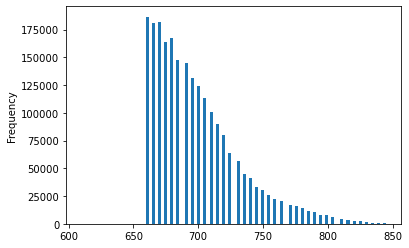

In [205]:
# loan_approval.groupby(['Year','fico_range_low']).agg({'policy_code' : 'count'})
loan_approval['fico_range_low'].plot.hist(by = 'fico_range_low',bins=100)

<AxesSubplot:ylabel='Frequency'>

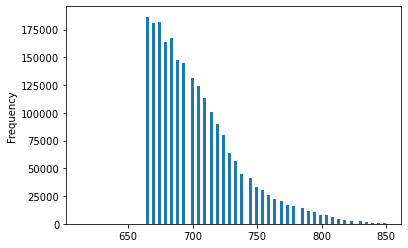

In [206]:
loan_approval['fico_range_high'].plot.hist(by = 'fico_range_high',bins=100)

In [209]:
loan_approval.loc[:,'fico_range'] = loan_approval.loc[:,'fico_range_high'] - loan_approval.loc[:,'fico_range_low']

<AxesSubplot:ylabel='Frequency'>

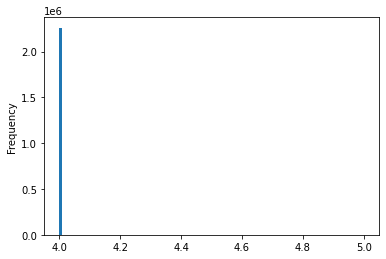

In [211]:
loan_approval['fico_range'].plot.hist(by='fico_range', bins=100)

/Users/abhinaykumar/opt/anaconda3/envs/P37/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:ylabel='Frequency'>

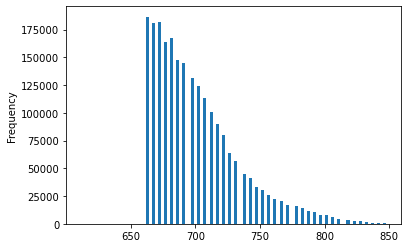

In [317]:
loan_approval.loc[:,'fico_avg'] = (loan_approval.loc[:,'fico_range_high'] + loan_approval.loc[:,'fico_range_low'])/2
loan_approval['fico_avg'].plot.hist(by='fico_avg', bins=100, xlabel = )

In [214]:
min(loan_approval['fico_range_low'])

610.0

<AxesSubplot:ylabel='Frequency'>

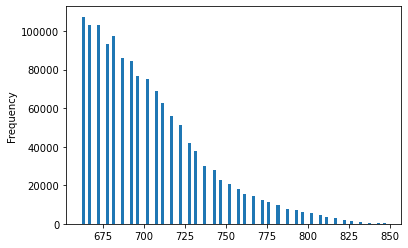

In [215]:
loan_approval[loan_approval['Year']>=2016]['fico_avg'].plot.hist(by='fico_avg', bins=100)

<AxesSubplot:ylabel='Frequency'>

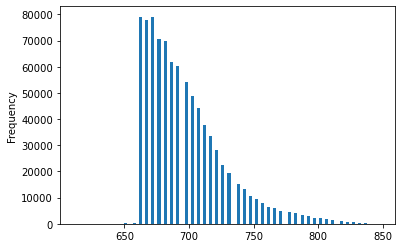

In [216]:
loan_approval[loan_approval['Year']<2016]['fico_avg'].plot.hist(by='fico_avg', bins=100)

In [221]:
loan_approval[loan_approval['Year']<2016]['fico_avg'].describe()

count    887440.000000
mean        696.943984
std          30.492781
min         612.000000
25%         672.000000
50%         692.000000
75%         712.000000
max         847.500000
Name: fico_avg, dtype: float64

In [222]:
loan_approval[loan_approval['Year']>=2016]['fico_avg'].describe()

count    1.373228e+06
mean     7.029434e+02
std      3.433543e+01
min      6.620000e+02
25%      6.770000e+02
50%      6.970000e+02
75%      7.220000e+02
max      8.475000e+02
Name: fico_avg, dtype: float64

In [224]:
min(loan_approval[loan_approval['Year']>=2016]['fico_avg'])

662.0

In [226]:
min(loan_approval[loan_approval['Year']<2010]['fico_avg'])

612.0

Change in threshold of FICO scores for approved loans : ~610 to ~660

In [308]:
loan_approval.groupby('Year').agg({'fico_avg' : 'median'})

,fico_avg
Year,
2007.0,682.0
2008.0,692.0
2009.0,712.0
2010.0,712.0
2011.0,712.0
2012.0,697.0
2013.0,692.0
2014.0,687.0
2015.0,687.0


## Interest Rates

In [319]:
loan_approval.groupby('Year').agg({'int_rate' : 'std'})

,int_rate
Year,
2007.0,2.730695
2008.0,2.528280
2009.0,2.670839
2010.0,3.487358
2011.0,4.149172
2012.0,4.371952
2013.0,4.437536
2014.0,4.326218
2015.0,4.318782


In [320]:
loan_approval[['Year','int_rate']].to_csv('box_plot.csv',index=False)

<AxesSubplot:title={'center':'int_rate'}, xlabel='Year'>

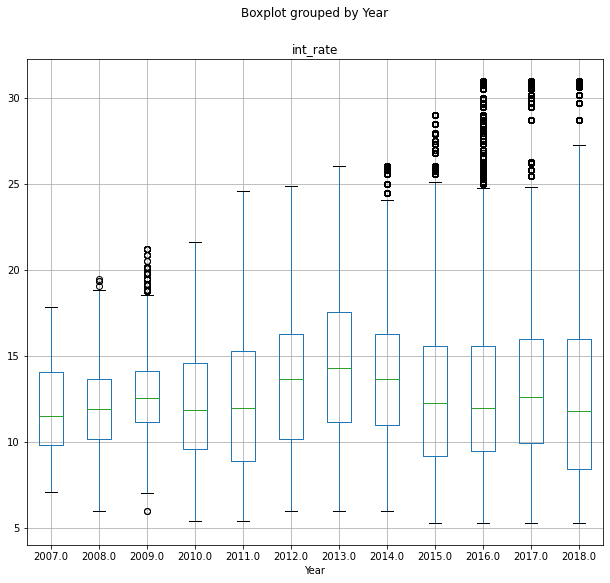

In [323]:
# halted projected growth rate
loan_approval[['Year','int_rate']].boxplot(column='int_rate',by='Year',figsize=(10,9))

In [273]:
loan_approval.groupby('Year').agg({'policy_code' : 'count'})

,policy_code
Year,
2007.0,603
2008.0,2393
2009.0,5281
2010.0,12537
2011.0,21721
2012.0,53367
2013.0,134814
2014.0,235629
2015.0,421095


<AxesSubplot:ylabel='Frequency'>

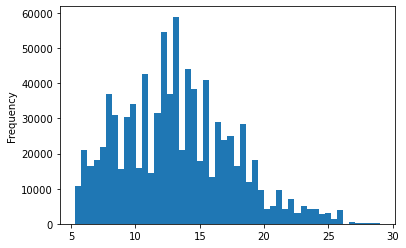

In [240]:
loan_approval[loan_approval['Year']<2016]['int_rate'].plot.hist(by='int_rate', bins = 50)

<AxesSubplot:ylabel='Frequency'>

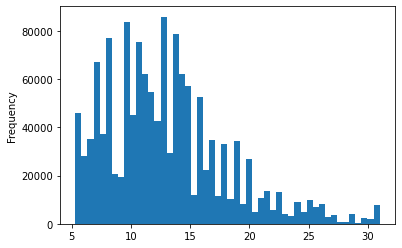

In [241]:
loan_approval[loan_approval['Year']>=2016]['int_rate'].plot.hist(by='int_rate', bins = 50)

In [258]:
loan_approval[loan_approval['Year']<2016].groupby(['purpose']).agg({'int_rate' : 'count'})

,int_rate
purpose,
car,8864
credit_card,206194
debt_consolidation,524253
educational,423
home_improvement,51834
house,3707
major_purchase,17277
medical,8541
moving,5415


## Deliquency Records of the Borrowers

In [264]:
loan_approval.groupby('loan_status').agg({'acc_now_delinq' : 'mean','delinq_amnt' : 'mean'})

,acc_now_delinq,delinq_amnt
loan_status,,
Charged Off,0.005656,19.434139
Current,0.002786,8.390733
Default,0.000000,0.000000
Does not meet the credit policy. Status:Charged Off,0.000000,0.000000
Does not meet the credit policy. Status:Fully Paid,0.002039,3.098879
Fully Paid,0.004893,13.763524
In Grace Period,0.003912,14.329303
Late (16-30 days),0.004369,16.443550
Late (31-120 days),0.004006,16.602972


In [276]:
loan_approval[(loan_approval['loan_status'] == 'Charged Off')|(loan_approval['loan_status'] == 'Fully Paid')].groupby(['Year','loan_status']).policy_code.count()

Year    loan_status
2007.0  Charged Off        45
        Fully Paid        206
2008.0  Charged Off       247
        Fully Paid       1315
2009.0  Charged Off       594
        Fully Paid       4122
2010.0  Charged Off      1487
        Fully Paid      10049
2011.0  Charged Off      3297
        Fully Paid      18424
2012.0  Charged Off      8644
        Fully Paid      44723
2013.0  Charged Off     21024
        Fully Paid     113780
2014.0  Charged Off     41161
        Fully Paid     181941
2015.0  Charged Off     75803
        Fully Paid     299742
2016.0  Charged Off     68242
        Fully Paid     224853
2017.0  Charged Off     39148
        Fully Paid     130152
2018.0  Charged Off      8867
        Fully Paid      47444
Name: policy_code, dtype: int64

In [266]:
loan_approval.corr()

,acc_now_delinq,delinq_amnt,int_rate,hardship_length,settlement_amount,settlement_percentage,settlement_term,pub_rec_bankruptcies,pub_rec,policy_code,loan_amnt,funded_amnt_inv,funded_amnt,fico_range_low,fico_range_high,dti_joint,dti,annual_inc_joint,annual_inc,Year
acc_now_delinq,1.000000,0.170756,0.015562,NaN,-0.002129,-0.004377,-0.004801,-0.008815,0.000788,NaN,-0.000528,-0.000441,-0.000494,-0.038108,-0.038107,-0.001822,-0.000195,0.002491,0.007322,-0.012380
delinq_amnt,0.170756,1.000000,0.004939,NaN,-0.005695,-0.003046,0.001606,-0.001099,0.004111,NaN,0.000876,0.000900,0.000886,-0.011029,-0.011029,-0.005008,-0.003739,0.004096,0.003848,-0.001128
int_rate,0.015562,0.004939,1.000000,NaN,0.310976,-0.012881,0.113606,0.056653,0.053381,NaN,0.098082,0.098129,0.098097,-0.415995,-0.415991,0.223255,0.124491,-0.123487,-0.050583,-0.044630
hardship_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_amount,-0.002129,-0.005695,0.310976,NaN,1.000000,0.195247,0.259616,-0.069541,-0.055074,NaN,0.802467,0.802240,0.802567,0.082600,0.082600,0.046829,0.043349,0.362950,0.165107,0.127527
settlement_percentage,-0.004377,-0.003046,-0.012881,NaN,0.195247,1.000000,0.063345,-0.004953,-0.001231,NaN,-0.059011,-0.059208,-0.058842,0.027031,0.027031,0.004788,0.006131,0.034765,-0.006011,0.145156
settlement_term,-0.004801,0.001606,0.113606,NaN,0.259616,0.063345,1.000000,0.014029,0.019789,NaN,0.220636,0.221910,0.221233,-0.003480,-0.003480,-0.028368,0.042419,-0.010861,0.021864,0.380460
pub_rec_bankruptcies,-0.008815,-0.001099,0.056653,NaN,-0.069541,-0.004953,0.014029,1.000000,0.659237,NaN,-0.083562,-0.083253,-0.083447,-0.196426,-0.196423,-0.026357,-0.012379,-0.066237,-0.027132,0.029769
pub_rec,0.000788,0.004111,0.053381,NaN,-0.055074,-0.001231,0.019789,0.659237,1.000000,NaN,-0.058772,-0.058288,-0.058636,-0.188583,-0.188580,-0.034858,-0.026029,-0.052346,-0.002543,0.005689
policy_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
loan_approval.groupby('Year').agg({'fico_avg' : 'max'})

,fico_avg
Year,
2007.0,822.0
2008.0,827.0
2009.0,822.0
2010.0,822.0
2011.0,827.0
2012.0,847.5
2013.0,847.5
2014.0,847.5
2015.0,847.5
